## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import math

import sys
import os

pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
np.random.seed(311)

## Load Data

In [3]:
current_file_path = os.path.dirname(os.path.realpath('__file__'))
current_folder_name = 'code'

project_base_path = current_file_path.removesuffix(current_folder_name)
temperature_filepath = project_base_path + '/data/input/temperature data.xlsx'

In [4]:
temperature_df = pd.read_excel(
    temperature_filepath, 
    header = 1
)

temperature_df.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Room B,GSW+MU.1,AFLH.1,AFLH+FB.1,GSW+FM.1,AFLH+MU.1,AFLN+FM.1,GSW+FB.1,AFLN+FB.1,AFLH+FM.1,AFLN+MU.1,Room C,AFLH+FM.2,GSW+FB.2,GSW+MU.2,AFLN+FM.2,GSW+FM.2,AFLH.2,AFLN+MU.2,AFLN+FB.2,AFLH+FB.2,AFLH+MU.2
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,20.4,14.2,17.3,15.3,15.1,15.1,13.4,14.7,13.4,15.1,12.9,20.7,18.1,14.5,19.4,13.4,14.8,16.9,12.7,13.5,15.0,14.8
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,20.5,14.2,17.4,15.3,15.1,15.2,13.5,14.7,13.5,15.2,13.0,20.9,18.1,14.6,19.4,13.5,14.9,17.0,12.8,13.6,15.1,14.8
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,20.7,14.3,17.5,15.4,15.1,15.2,13.6,14.8,13.6,15.2,13.0,21.1,18.2,14.6,19.4,13.7,14.9,17.2,12.9,13.7,15.1,14.9
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,20.8,14.3,17.6,15.5,15.2,15.3,13.7,14.8,13.7,15.3,13.1,21.2,18.2,14.6,19.5,13.8,14.9,17.3,13.0,13.8,15.2,15.0
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,21.0,14.4,17.7,15.6,15.2,15.4,13.9,14.8,13.9,15.4,13.2,21.4,18.3,14.7,19.5,14.0,15.0,17.4,13.2,13.9,15.3,15.1


In [5]:
temperature_df.shape

(2154, 36)

In [6]:
print('Columns:\n')
print(*temperature_df.columns, sep = ' ')

Columns:

Date Time Date/time Room A GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Room B GSW+MU.1 AFLH.1 AFLH+FB.1 GSW+FM.1 AFLH+MU.1 AFLN+FM.1 GSW+FB.1 AFLN+FB.1 AFLH+FM.1 AFLN+MU.1 Room C AFLH+FM.2 GSW+FB.2 GSW+MU.2 AFLN+FM.2 GSW+FM.2 AFLH.2 AFLN+MU.2 AFLN+FB.2 AFLH+FB.2 AFLH+MU.2


## Transform Dataframe for organizing blocks(bottles) better

Split dataset into subsets per each block(bottle)

In [7]:
temperature_df_subset_A = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room A', 
        'GSW+FM', 'AFLN+MU', 'AFLN+FB',
       'AFLH+FM', 'AFLH+MU', 'AFLH', 
        'GSW+FB', 'AFLN+FM', 'GSW+MU', 'AFLH+FB'
    ]
]

temperature_df_subset_B = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room B', 
        'GSW+MU.1', 'AFLH.1', 'AFLH+FB.1', 
        'GSW+FM.1', 'AFLH+MU.1', 'AFLN+FM.1', 
        'GSW+FB.1', 'AFLN+FB.1', 'AFLH+FM.1', 'AFLN+MU.1'
    ]
]

temperature_df_subset_C = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room C', 
        'AFLH+FM.2', 'GSW+FB.2', 'GSW+MU.2', 
        'AFLN+FM.2', 'GSW+FM.2', 'AFLH.2', 
        'AFLN+MU.2', 'AFLN+FB.2', 'AFLH+FB.2', 'AFLH+MU.2'
    ]
]

In [8]:
temperature_df_subset_A.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1


Transform columns into a common style:

Add a column indicating a block

In [9]:
temperature_df_subset_A['Block'] = 'A'
temperature_df_subset_B['Block'] = 'B'
temperature_df_subset_C['Block'] = 'C'

Remove block indicator

In [10]:
temperature_df_subset_A = temperature_df_subset_A.rename(columns = {'Room A': 'Room'})
temperature_df_subset_B = temperature_df_subset_B.rename(columns = {'Room B': 'Room'})
temperature_df_subset_C = temperature_df_subset_C.rename(columns = {'Room C': 'Room'})

Remove digits from column names for treatments

In [11]:
def remove_digits_from_column_names(df):
    df.columns = df.columns.str.replace('[\.\d]', '', regex = True)
    
remove_digits_from_column_names(temperature_df_subset_B)
remove_digits_from_column_names(temperature_df_subset_C)

Combine datasets with each block into one

In [12]:
temperature_df_transformed = pd.concat([
    temperature_df_subset_A, 
    temperature_df_subset_B,
    temperature_df_subset_C
], 
    ignore_index = True
)

In [13]:
temperature_df_transformed.head(10)

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A
5,2023-02-02,03:00:00,2023-02-02 03:00:00,21.4,15.4,13.7,14.3,15.8,16.0,18.1,15.3,14.5,14.7,22.2,A
6,2023-02-02,04:00:00,2023-02-02 04:00:00,21.5,15.4,13.8,14.5,15.9,16.1,18.2,15.3,14.6,14.8,22.3,A
7,2023-02-02,05:00:00,2023-02-02 05:00:00,21.6,15.5,14.0,14.6,16.0,16.2,18.3,15.4,14.8,14.9,22.4,A
8,2023-02-02,06:00:00,2023-02-02 06:00:00,21.7,15.5,14.1,14.7,16.1,16.2,18.4,15.4,14.9,14.9,22.4,A
9,2023-02-02,07:00:00,2023-02-02 07:00:00,21.9,15.6,14.2,14.9,16.2,16.3,18.4,15.5,15.0,15.0,22.5,A


## Data Cleaning

Convert Date to a pandas datetime object

In [14]:
temperature_df_transformed['Date'] = pd.to_datetime(
    temperature_df_transformed['Date']
)

temperature_df_transformed['Date/time'] = pd.to_datetime(
    temperature_df_transformed['Date/time']
)

Some records have unrealistic values for Date/time

In [15]:
temperature_df_transformed['Date/time'].min()

Timestamp('1970-01-01 00:00:00.000000045')

In [16]:
temperature_df_transformed[
    temperature_df_transformed['Date/time'] == temperature_df_transformed['Date/time'].min()
].head()

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
2150,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,68.0,209.0,410.0,435.0,0.0,279.0,198.0,678.0,122.0,377.0,A
4304,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,317.0,529.0,497.0,0.0,0.0,214.0,652.0,140.0,383.0,B
6458,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,210.0,617.0,465.0,0.0,0.0,173.0,707.0,316.0,382.0,C


Remove the records with unrealistic or missing values for Date and time

In [17]:
n_records_before_cleaning_dates = temperature_df_transformed.shape[0]

In [18]:
temperature_df_transformed.drop(
    temperature_df_transformed[
        temperature_df_transformed['Date/time'] <= np.datetime64('2000-01-01 00:00:00.000000045')
    ].index,
    inplace = True
)

In [19]:
temperature_df_transformed['Date/time'].min()

Timestamp('2023-02-01 22:00:00')

In [20]:
n_records_after_cleaning_dates = temperature_df_transformed.shape[0]

In [21]:
difference = n_records_before_cleaning_dates - n_records_after_cleaning_dates

print(
    f'{difference} rows have been removed'
)

12 rows have been removed


In [22]:
print('Columns:\n')
print(*temperature_df_transformed.columns.tolist(), sep = ' ')

Columns:

Date Time Date/time Room GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Block


Column 'Time' is redundant, we can drop it

In [23]:
temperature_df_transformed.drop('Time', axis = 1, inplace = True)

We don't need the treatments below anymore due to change of requirements.Therefore we can drop them

In [24]:
not_needed_treatments = ['AFLH+FM', 'AFLH+FB', 'AFLH+MU', 'AFLH']

In [25]:
temperature_df_transformed.drop(
    columns = not_needed_treatments, 
    inplace = True
)

## Visualize Temperature

Select treatments to visualize

In [26]:
temperature_columns = [ 
    'GSW+FM', 'GSW+FB', 'GSW+MU',
    'AFLN+FM', 'AFLN+FB','AFLN+MU'
]

Add colors indicating each block(bottle)

In [27]:
blocks = {'A': 'tab:blue', 'B': 'tab:olive', 'C': 'tab:orange'}

Add markers for legend for blocks

In [28]:
markers = [
    plt.Line2D(
        [0,0], [0,0], color = color, marker = 'o', linestyle = ''
    ) for color in blocks.values()
]

In [29]:
def plot_temperature(df, date_column, column, ax, plot_room_temperature):
    
    is_room_temperature_plotted = False
    
    if plot_room_temperature:
        columns = [column, date_column, 'Room']
    else:
        columns = [column, date_column]
    
    for block_name, color in blocks.items():
        
        data = df.loc[
            df['Block'] == block_name, columns
        ]
    
        ax.plot(date_column, column, data = data, color = color)
            
        if plot_room_temperature and not is_room_temperature_plotted:

            ax.plot(date_column, 'Room', data = data, color = 'tab:gray')
    
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d, %b, %Y')) 
    
    ax.set_title(column, loc = 'center', fontsize = 'medium')
    ax.set_ylabel('')
    ax.grid(True)
    
    for label in ax.get_xticklabels():
        label.set_ha('right')
        label.set_rotation(30.)
        label.set_color('tab:gray')
        label.set_size(8)
        
    ax.legend(markers, blocks.keys(), numpoints = 1)

In [30]:
def plot_temperature_for_multiple_columns(
    df,
    date_column,
    title = 'Temperature per treatment',
    plot_room_temperature = True,
    columns = temperature_columns
):
    n = math.ceil(len(temperature_columns) / 2)
    
    fig = plt.figure(figsize = (11, 4 * n))
    fig.subplots_adjust(hspace = 0.6, wspace = 0.5)
    
    fig.suptitle(
        title, 
        color = 'royalblue', 
        fontsize = 16,
        y = 0.93
    )

    for i, col in enumerate(temperature_columns):

        ax = fig.add_subplot(n, 2, i + 1)
        plot_temperature(df, date_column, col, ax, plot_room_temperature)

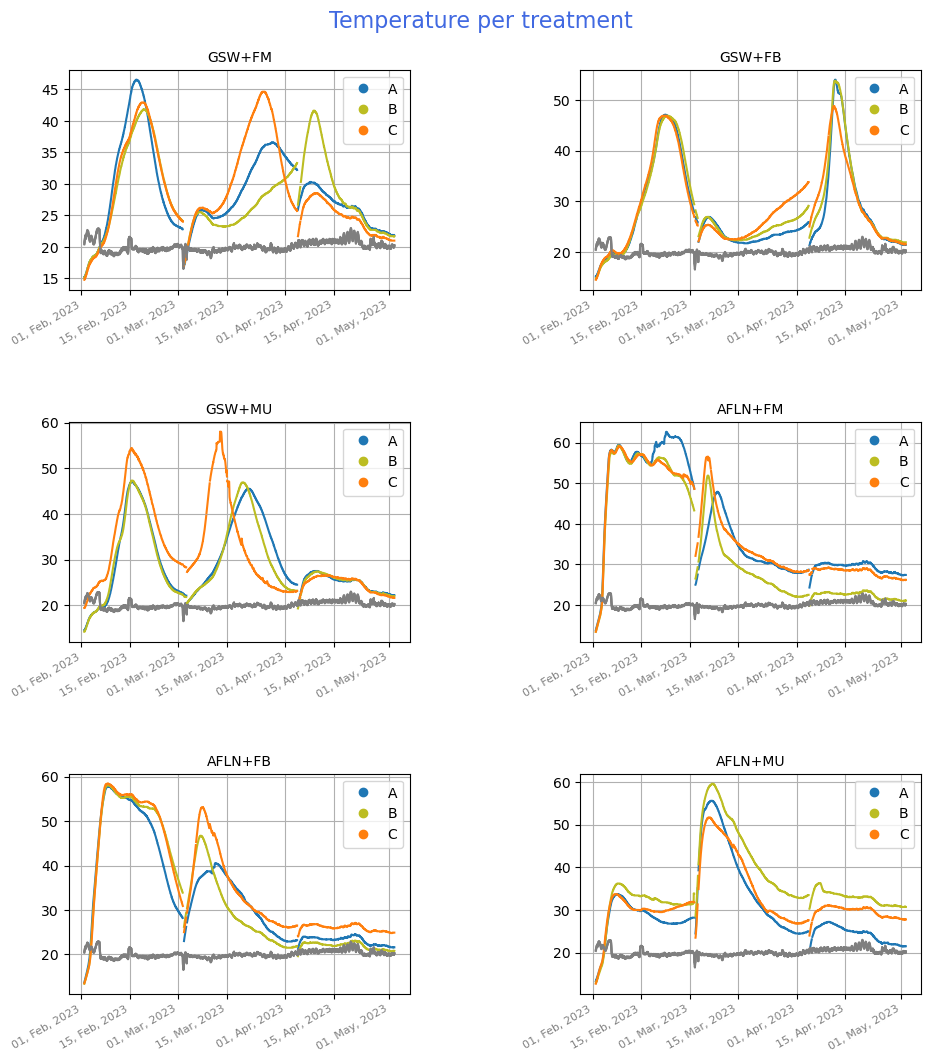

In [31]:
plot_temperature_for_multiple_columns(temperature_df_transformed, 'Date/time')

## Data Preprocessing for degree-days calculations

We transform dataset according to the method described in this research paper: [Thermal Load and Application](https://uomustansiriyah.edu.iq/media/lectures/5/5_2020_02_14!09_55_55_PM.pdf)

Set parameters

In [32]:
ROOM_TEMPERATURE = 20
THERMOPHILIC_TEMPERATURE = 45
TEMPERATURE_TO_STERILIZE = 55

In [33]:
temperature_columns

['GSW+FM', 'GSW+FB', 'GSW+MU', 'AFLN+FM', 'AFLN+FB', 'AFLN+MU']

In [34]:
cumulative_temperature_df = temperature_df_transformed.copy()

1. Calculate the difference between treatment temperature and base or reference temperature
2. If the treatment temperature is lower than the base or reference temperature use 0

In [35]:
base_temperature = ROOM_TEMPERATURE

In [36]:
def get_temperature_relative_to_base_temperature(data, column, base_temperature):
    
    return np.where((
        (data[column] - base_temperature) <= 0), 
        0, 
        data[column] - base_temperature
    )

In [37]:
for col in temperature_columns:
    cumulative_temperature_df[col] = get_temperature_relative_to_base_temperature(
        cumulative_temperature_df, 
        col,
        base_temperature = base_temperature
    )

In [38]:
cumulative_temperature_df.head()

,Date,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,GSW+FB,AFLN+FM,GSW+MU,Block
0,2023-02-01,2023-02-01 22:00:00,20.5,0.0,0.0,0.0,0.0,0.0,0.0,A
1,2023-02-01,2023-02-01 23:00:00,20.8,0.0,0.0,0.0,0.0,0.0,0.0,A
2,2023-02-02,2023-02-02 00:00:00,21.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,2023-02-02,2023-02-02 01:00:00,21.1,0.0,0.0,0.0,0.0,0.0,0.0,A
4,2023-02-02,2023-02-02 02:00:00,21.3,0.0,0.0,0.0,0.0,0.0,0.0,A


Calculate mean of the temperature data per day

In [39]:
cumulative_temperature_df = cumulative_temperature_df.groupby(
    ['Block', 'Date'], 
    as_index = False
)[
    ['GSW+FM', 'GSW+FB', 'GSW+MU', 'AFLN+FM', 'AFLN+FB','AFLN+MU']
].mean()

In [40]:
cumulative_temperature_df.head()

,Block,Date,GSW+FM,GSW+FB,GSW+MU,AFLN+FM,AFLN+FB,AFLN+MU
0,A,2023-02-01,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,A,2023-02-02,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,A,2023-02-03,0.0,0.0,0.0,1.341667,1.104167,0.000000
3,A,2023-02-04,0.0,0.0,0.0,18.566667,11.091667,1.708333
4,A,2023-02-05,0.0,0.0,0.0,33.525000,20.779167,7.762500


Calculate accumulated(integral) treatment temperature starting after a certain threshold

In [41]:
def get_accumulated_temperature(data, column, threshold): 
    
    start_date = data[data[column] > threshold].Date.min()
    
    data['is_threshold_met'] = np.where(
        (data['Date'] >= start_date), 1, 0
    )
    
    data['cum_temp'] = data.groupby(
        'is_threshold_met'
    )[column].cumsum()
    
    data[column] = np.where(
        (data['is_threshold_met'] == 1), 
        data['cum_temp'], 
        data[column]
    )
    
    data.drop(
        columns = ['is_threshold_met', 'cum_temp'], inplace = True
    )
    
    return data

In [42]:
def transform_dataframe_temperature(data, threshold):

    for temp_column in temperature_columns:

        data = get_accumulated_temperature(data, temp_column, threshold)
        
    return data

Calculate accumulated temperature per each block(bottle) and combine subsets together into one dataset

In [43]:
block_values = cumulative_temperature_df.Block.unique().tolist()
block_values

['A', 'B', 'C']

In [44]:
def transform_temperature_for_all_blocks(threshold = 0):
    cumulative_temperature_dfs = []

    for block in block_values:
        data_sunset_per_block = cumulative_temperature_df[
            cumulative_temperature_df.Block == block
        ]

        data_sunset_per_block = transform_dataframe_temperature(
            data_sunset_per_block, 
            threshold
        )

        cumulative_temperature_dfs.append(data_sunset_per_block)


    cumulative_temperature_df_updated = pd.concat(
        cumulative_temperature_dfs, 
        ignore_index = True
    )
    
    return cumulative_temperature_df_updated
    

In [45]:
room_cumulative_temperature_df = transform_temperature_for_all_blocks(
    threshold = 0
)

In [46]:
room_cumulative_temperature_df.head(10)

,Block,Date,GSW+FM,GSW+FB,GSW+MU,AFLN+FM,AFLN+FB,AFLN+MU
0,A,2023-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A,2023-02-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A,2023-02-03,0.000000,0.000000,0.000000,1.341667,1.104167,0.000000
3,A,2023-02-04,0.000000,0.000000,0.000000,19.908333,12.195833,1.708333
4,A,2023-02-05,0.000000,0.000000,0.000000,53.433333,32.975000,9.470833
5,A,2023-02-06,0.229167,0.000000,0.000000,91.495833,62.279167,21.283333
6,A,2023-02-07,1.629167,0.000000,0.000000,129.450000,97.316667,34.695833
7,A,2023-02-08,5.270833,0.000000,0.570833,168.687500,134.925000,48.300000
8,A,2023-02-09,12.308333,0.000000,3.487500,207.150000,172.462500,61.504167
9,A,2023-02-10,23.283333,0.245833,10.154167,243.654167,209.270833,73.795833


Visualize the accumulated temperature per treatment

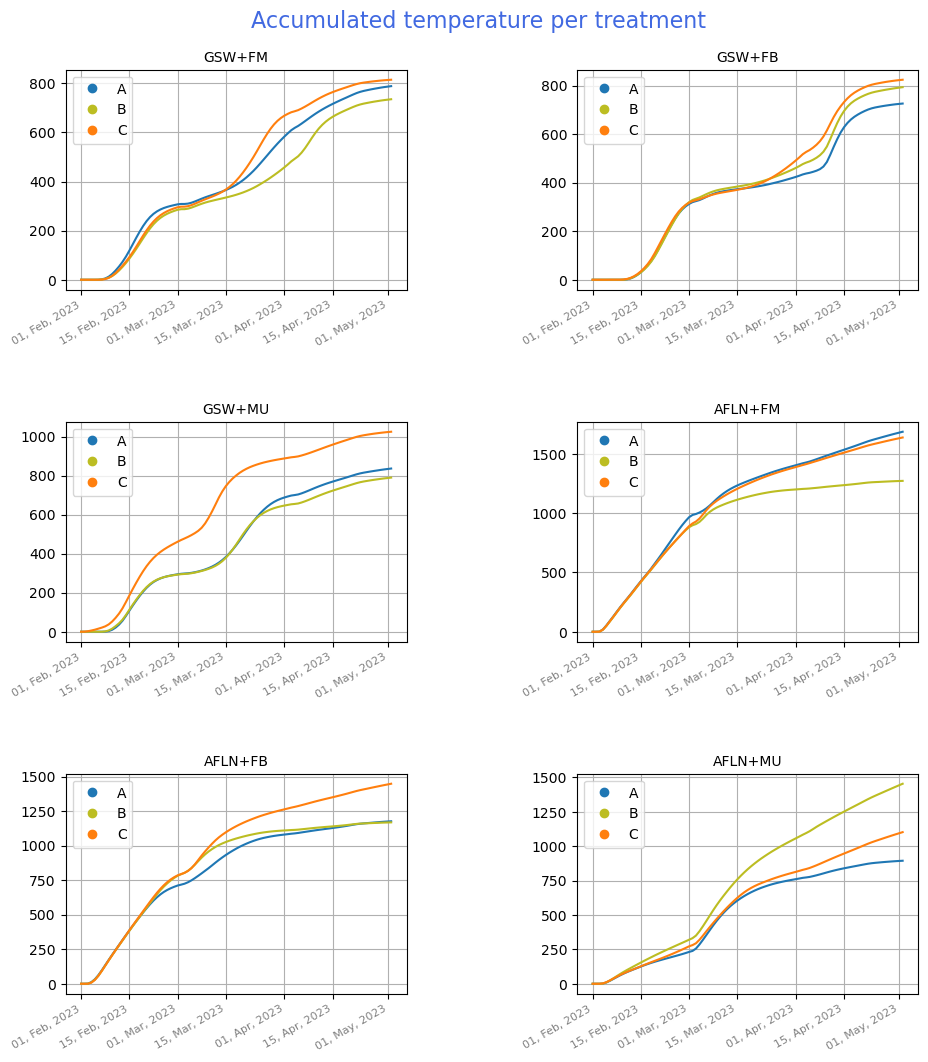

In [47]:
plot_temperature_for_multiple_columns(
    room_cumulative_temperature_df, 
    'Date', 
    title = 'Accumulated temperature per treatment',
    plot_room_temperature = False
)

In [48]:
thermophilic_cumulative_temperature_df = transform_temperature_for_all_blocks(
    threshold = THERMOPHILIC_TEMPERATURE
)

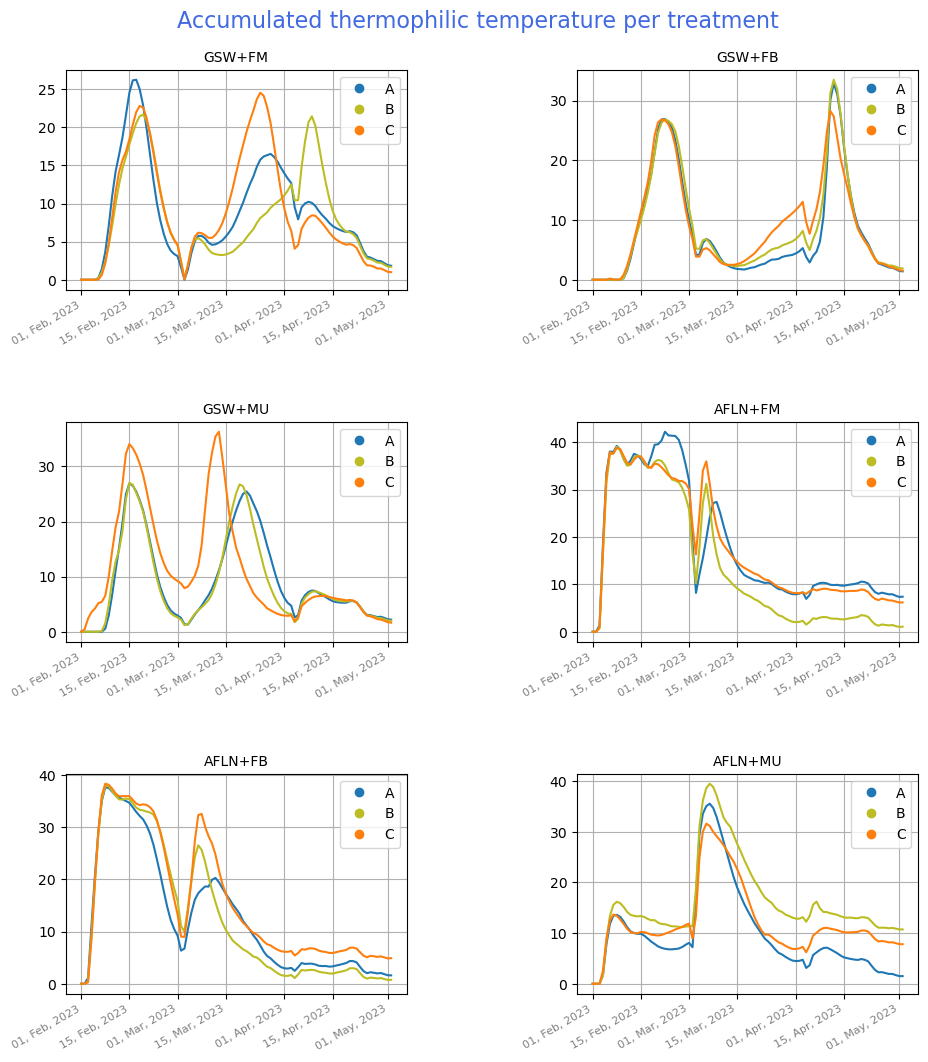

In [49]:
plot_temperature_for_multiple_columns(
    thermophilic_cumulative_temperature_df, 
    'Date', 
    title = 'Accumulated thermophilic temperature per treatment',
    plot_room_temperature = False
)

In [50]:
sterilize_cumulative_temperature_df = transform_temperature_for_all_blocks(
    threshold = TEMPERATURE_TO_STERILIZE
)

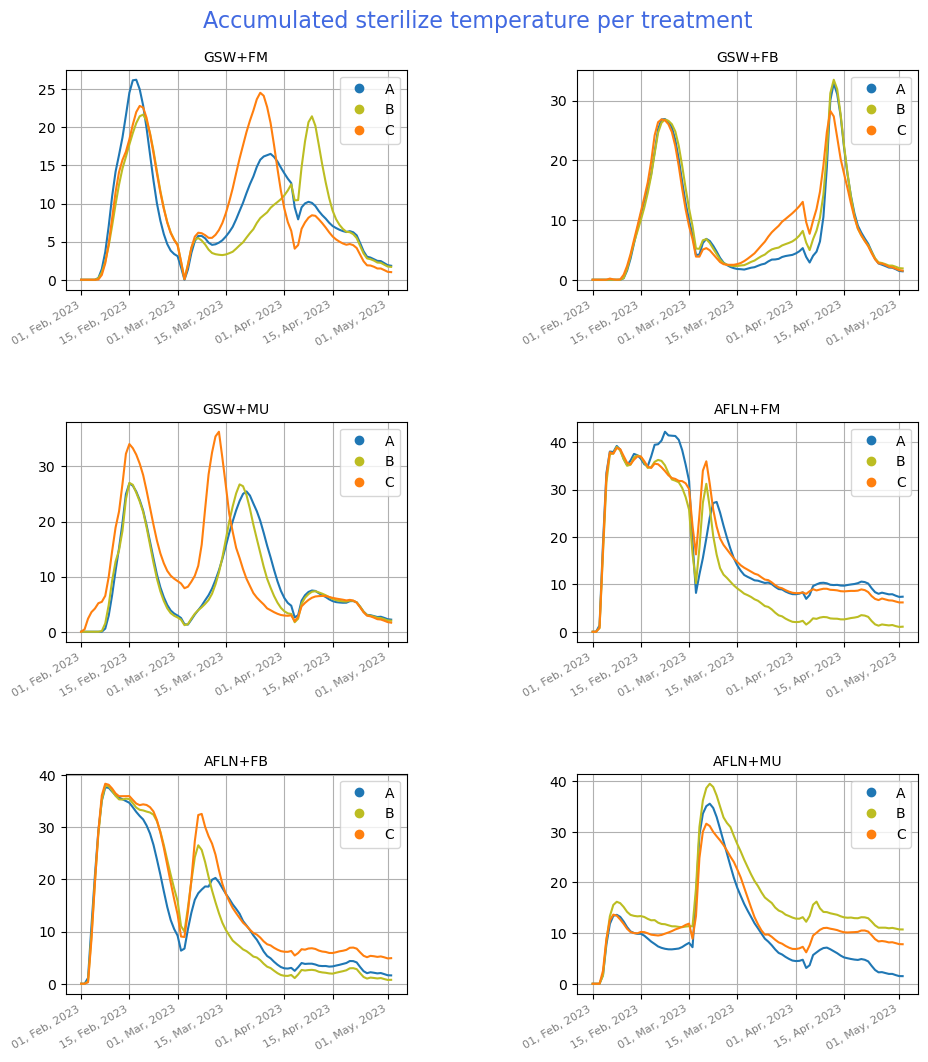

In [51]:
plot_temperature_for_multiple_columns(
    sterilize_cumulative_temperature_df, 
    'Date', 
    title = 'Accumulated sterilize temperature per treatment',
    plot_room_temperature = False
)

## Save data

In [52]:
cumulative_temperature_dataframes = {
    'room based cumulative temperature.xlsx': room_cumulative_temperature_df,
    'thermophilic cumulative temperature.xlsx': thermophilic_cumulative_temperature_df,
    'sterilize cumulative temperature.xlsx': sterilize_cumulative_temperature_df
}

In [53]:
output_data_filepath = project_base_path + '/data/output/'
task_filepath = 'Accumulated Temperature Generation/'

In [54]:
for local_file_path, dataframe in cumulative_temperature_dataframes.items():
    
    filepath = output_data_filepath + task_filepath + local_file_path
    dataframe.to_excel(filepath, index = False)